# Lab-Assignment

Nigel Sjölin Grech MA661E - VT2021

## Wind Power Forecasting 


### TODO:
- [X] 1.1 Data Preparation
    - [X] 1.1.1 Reading Data 
    - [X] 1.1.2 Explaining Column Names
- [] 1.2. Manipulating Data
    - [] 1.2.1 Finding and handling Missing Values
        - [X] 1.2.1.1 Visualizing Missing Data 
        - [X] 1.2.1.2 Handling missing Data
    - [X] 1.2.2 --Converting Categorical Data-- No Categorical data in the data set
    - [] 1.2.3 Aggregation of Data 
        - [] 1.2.3.1 Yearly grouping 
        - [] 1.2.3.2 Monthly grouping
        - [] 1.2.3.3 Lagging 
- [] 2 Exploring Data
    - [] 2.1 Analyzing the feasibility of values
    - [] 2.2 Univariate data analysis 
        - [] 2.2.1 Box plots and handling of outliers
            - [] 2.2.1.1 Box plots on groupings 
    - [] 2.3 Bivariate data analysis (some of these can be replaces with time series techniques)
        - [] 2.3.1 Heat maps
        - [] 2.3.2 Scatter plots
        - [] 2.3.3 Joint distribution plots with regression fit 
        - [] 2.3.4 Plotting Category dependencies  
    - [] 2.4 Hypothesis testing (t-test)
- [] 3 Clustering
    - [] 3.1 Identify number of clusters 
    - [] 3.2 Clustering with k-means
- [] 4 Dimensionality reduction 
    - [] 4.1 Reduce dims with PCA
    - [] 4.2 Scatter plot of reduced dims
    - [] 4.3 Cluster labeling 

## Imports

- os - operating system function, used to make platform independent paths
- Pandas - for data manipulation 
- Numpy - for array and mathematical functions 
- missingno - specific library for visualizing missing data
- plotly - for generating visualization 


In [301]:
import pandas as pd
import numpy as np
import missingno as msno
import os 
from plotly import express as px
from plotly import graph_objects as go
import seaborn as sns

pd.set_option('display.max_columns', 50)

## 1. Data Preparation

### 1.1 Reading data 

Here data is read using pandas' read_csv method. One note is that the os.path.join function is used for platform independence. The head and tail of the data is displayed and we can make an observation: that the top of the file is missing data, while the bottom not so much this may indicate inconsistent data collection at the beginning of the process. 

In [302]:
raw_turbine_path = os.path.join(os.pardir, 'data', 'Turbine_Data.csv')
raw_turbine_data = pd.read_csv(raw_turbine_path)

In [303]:
raw_turbine_data.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [304]:
raw_turbine_data.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,1029.834789,57.694813,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


#### Explaining the column names 

| Column Name                  	| Description                                                  	|
|------------------------------	|--------------------------------------------------------------	|
| Time Stamp (Unnamed 0)       	| Time stamp of the data recording, from Jan 2018 - March 2020 	|
| ActivePower                  	| The power generated by the turbine                           	|
| Ambient temperature          	| The ambient temperature around the turbine                   	|
| BearingShaftTemperature      	| The temperature of the turbine's bearing shaft               	|
| Blade1PitchAngle             	| The pitch angle for the turbine's blade 1                    	|
| Blade2PitchAngle             	| The pitch angle for the turbine's blade 2                    	|
| Blade3PitchAngle             	| The pitch angle for the turbine's blade 3                    	|
| ControlBoxTemperature        	| The temperature of the turbine's control box                 	|
| GearboxBearingTemperature    	| The temperature of the turbine's gearbox bearing             	|
| GearboxOilTemperature        	| The temperature of the turbine's gearbox oil                 	|
| GeneratorRPM                 	| Rotations per min for the generator                           |
| GeneratorWinding1Temperature 	| Generator Winding 1 Temperature sensor                        |
| GeneratorWinding2Temperature 	| Generator Winding 2 Temperature sensor                        |
| HubTemperature               	| Hub Temperature                                               |
| MainBoxTemperature          	| Main Box Temperature                                        	|
| NacellePosition           	| The nacelle is the casing on top of the tower that contains components necessary to move the turbine into the wind.|
| ReactivePower               	| Power that flows back from a destination toward the grid in an alternating current scenario.|
| RotorRPM                     	| Rotations per min for the Rotator|
| TurbineStatus                 | Turbine statuses, no description of their meaning|
| WTG                          	| Turbine Name                                                 	|
| WindDirection               	| Wind direction in degrees from north|
| WindSpeed                    	| Wind Speed                                                             	|

### 1.2. Manipulating Data




#### 1.2.1 Finding and handling Missing Values

In [305]:
# defining a na info display function
# we can alternatively use the df.info here but this has a prettier output

def get_info_pdf(df):
    info_df = pd.concat([df.dtypes, df.count(), df.isna().sum()], axis=1).reset_index()\
            .rename(columns={'index':'feature', 0:'dtype', 1:'# values', 2:'# na'})
    info_df['% missing'] = np.ceil((info_df['# na']*100)/len(df))
    return info_df

get_info_pdf(raw_turbine_data)

,feature,dtype,# values,# na,% missing
0,Unnamed: 0,object,118224,0,0.0
1,ActivePower,float64,94750,23474,20.0
2,AmbientTemperatue,float64,93817,24407,21.0
3,BearingShaftTemperature,float64,62518,55706,48.0
4,Blade1PitchAngle,float64,41996,76228,65.0
5,Blade2PitchAngle,float64,41891,76333,65.0
6,Blade3PitchAngle,float64,41891,76333,65.0
7,ControlBoxTemperature,float64,62160,56064,48.0
8,GearboxBearingTemperature,float64,62540,55684,48.0
9,GearboxOilTemperature,float64,62438,55786,48.0


##### 1.2.1.1 Visualizing Missing Data

<AxesSubplot:>

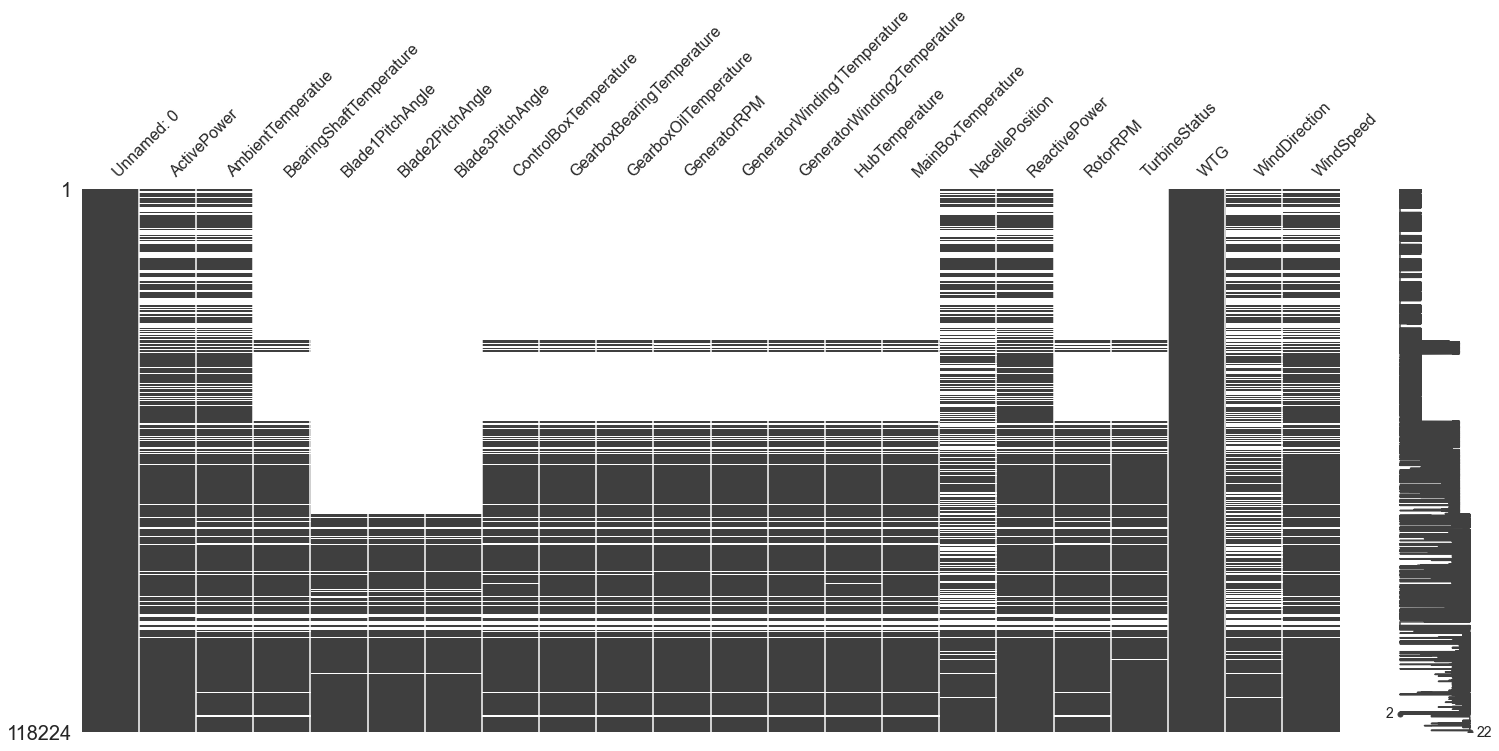

In [306]:
msno.matrix(raw_turbine_data)

##### 1.2.1.2 Fixing time series index and value range

We see there is a lot of missing data at the top of the set so we will also look at the missing data by year.

To do this we: 
- rename the time stamp col
- cast it to pandas datetime format 
- set it as the index 

In [307]:
tmp_1 = raw_turbine_data.rename(columns={'Unnamed: 0': 'TimeStamp'})
tmp_1['TimeStamp'] = pd.to_datetime(tmp_1['TimeStamp'])
missing_turbine_data = tmp_1.set_index('TimeStamp')
missing_turbine_data = missing_turbine_data.tz_localize(None)

We can also drop the 'WTG' column since it is just the wind turbine name and there is only one turbine.

In [308]:
missing_turbine_data.WTG.value_counts()

G01    118224
Name: WTG, dtype: int64

In [309]:
missing_turbine_data = missing_turbine_data.drop('WTG', axis=1)

We can now use loc to slice the data by year

<AxesSubplot:>

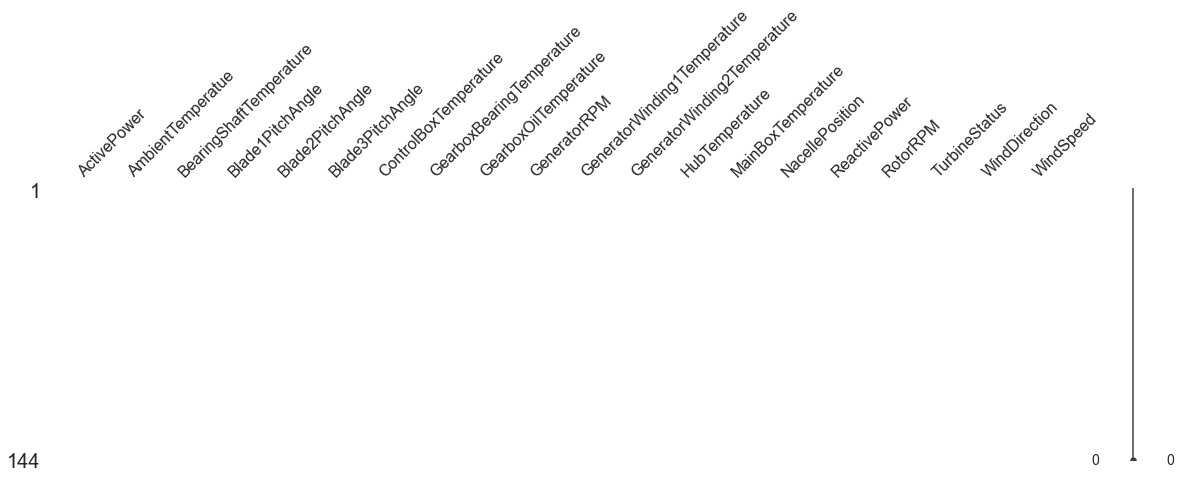

In [310]:
msno.matrix(missing_turbine_data.loc['2017'], figsize=(20, 5))

When we look at the 2017 data we see none of the columns have any values so we can safely drop all these rows.

In [311]:
before_shape = missing_turbine_data.shape
print(f'Shape before dropping 2017 rows: {before_shape}')

missing_turbine_data_v2 = missing_turbine_data.loc['2018':]

print(f'Shape after dropping 2017 rows: {missing_turbine_data_v2.shape}, we loose {before_shape[0] - missing_turbine_data_v2.shape[0]} rows')

Shape before dropping 2017 rows: (118224, 20)
Shape after dropping 2017 rows: (118080, 20), we loose 144 rows


<AxesSubplot:>

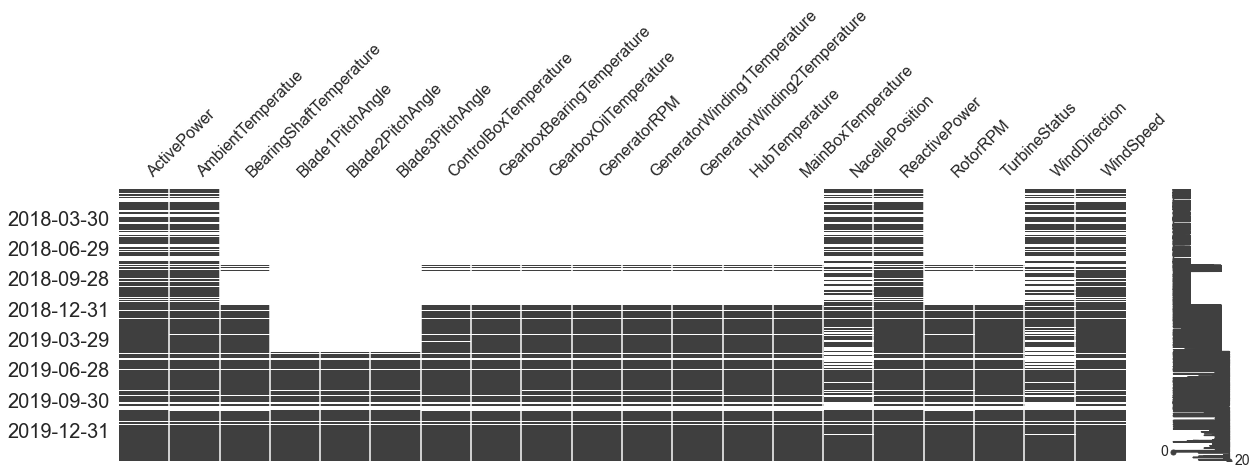

In [312]:
msno.matrix(missing_turbine_data_v2, figsize=(20, 5), freq='BQ')

In [313]:
# looking at the % of missing data again 

get_info_pdf(missing_turbine_data_v2)

,feature,dtype,# values,# na,% missing
0,ActivePower,float64,94750,23330,20.0
1,AmbientTemperatue,float64,93817,24263,21.0
2,BearingShaftTemperature,float64,62518,55562,48.0
3,Blade1PitchAngle,float64,41996,76084,65.0
4,Blade2PitchAngle,float64,41891,76189,65.0
5,Blade3PitchAngle,float64,41891,76189,65.0
6,ControlBoxTemperature,float64,62160,55920,48.0
7,GearboxBearingTemperature,float64,62540,55540,48.0
8,GearboxOilTemperature,float64,62438,55642,48.0
9,GeneratorRPM,float64,62295,55785,48.0


We se the blade pitch columns are still missing in 65% of the data so we will drop these columns.

<AxesSubplot:>

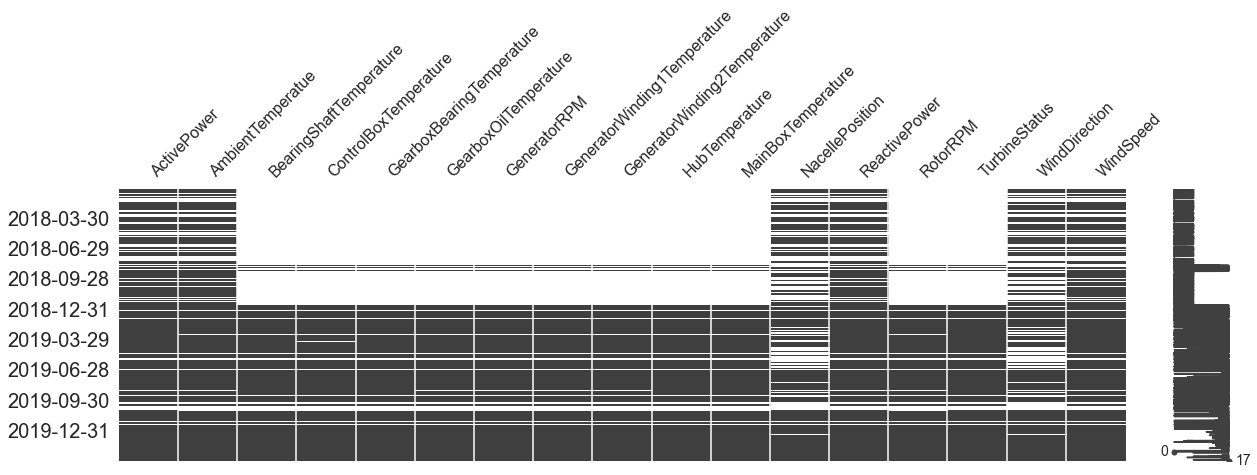

In [314]:
missing_turbine_data_v3 = missing_turbine_data_v2.drop(['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle'], axis=1)
msno.matrix(missing_turbine_data_v3, figsize=(20, 5), freq='BQ')

This now leaves us with 11 columns missing ~48% of their data and 6 columns missing 
~20%.

##### 1.2.1.3 Dropping uncorrelated columns 

We now look at the correlations in the data to remove some of the columns and reduce the amount of missing values we need to fill.

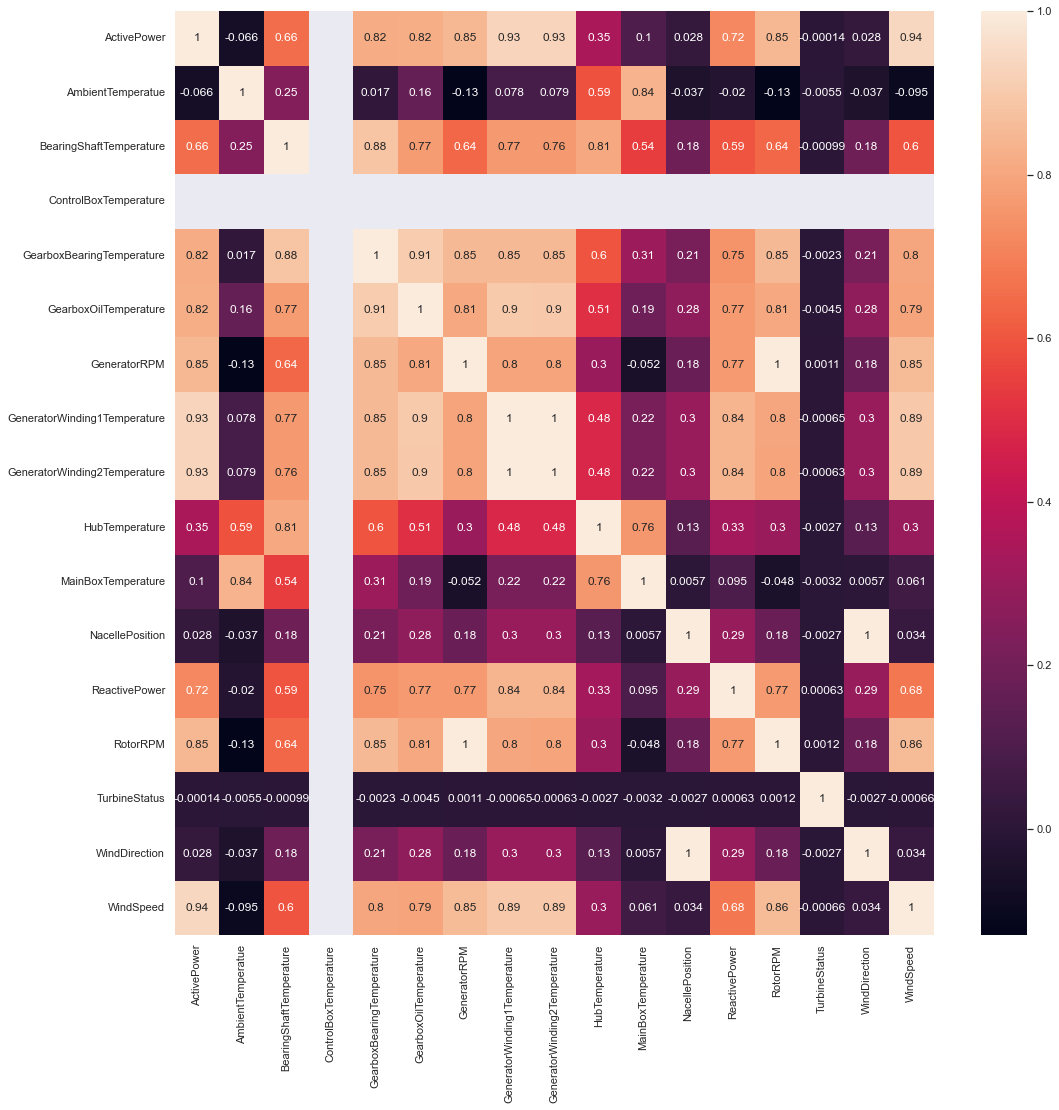

In [315]:
sns.set(rc={'figure.figsize':(17,17)})
_ = sns.heatmap(missing_turbine_data_v3.corr(), annot=True)

If we look at Active power being the target values for this data set we can start by removing those columns in the range -0.5 to 0.5:

In [316]:
cols_to_drop = [missing_turbine_data_v3.columns[i] for i, corr in enumerate(missing_turbine_data_v3.corr()['ActivePower']) if (corr < 0.5) and (corr > -0.5)] 
cols_to_drop

['AmbientTemperatue',
 'HubTemperature',
 'MainBoxTemperature',
 'NacellePosition',
 'TurbineStatus',
 'WindDirection']

We also look into the control box temperature since is has a NA correlation 

In [317]:
# Checking control box temperature values 
missing_turbine_data_v3[['ControlBoxTemperature']].value_counts()

ControlBoxTemperature
0.0                      62160
dtype: int64

We see that it has a only one value if 0.0 so we can drop the column

In [318]:
cols_to_drop.append('ControlBoxTemperature')

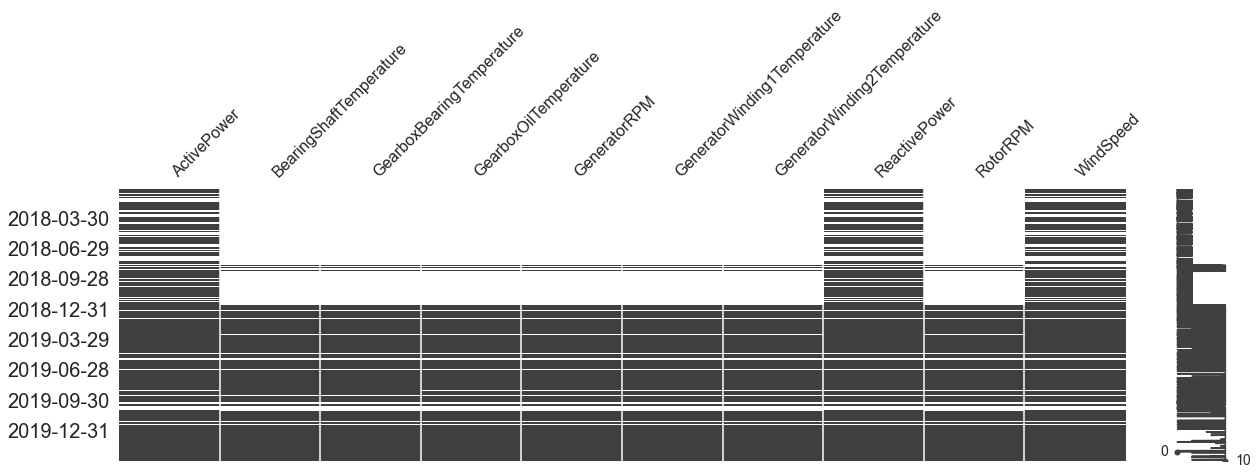

In [319]:
missing_turbine_data_v4 = missing_turbine_data_v3.drop(cols_to_drop, axis=1)
_ = msno.matrix(missing_turbine_data_v4, figsize=(20, 5), freq='BQ')

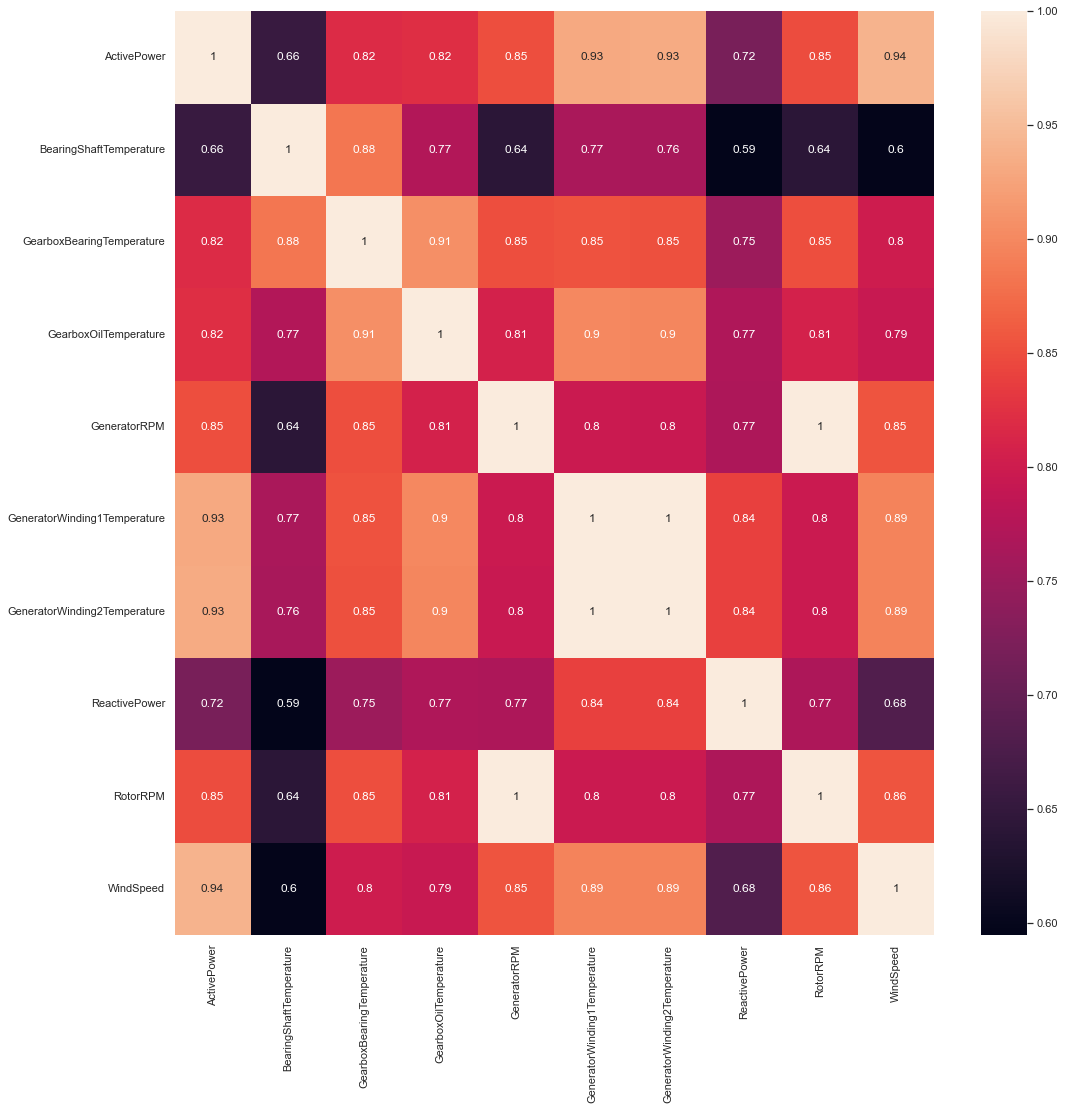

In [320]:
_ = sns.heatmap(missing_turbine_data_v4.corr(), annot=True)

Of the remaining columns we also see that some are highly correlate with each other. We will keep these columns for now.

##### 1.2.1.4 Dropping rows


To further reduce the amount of missing data we will now resample the data. Currently each row is a 10 min reading, we will see the effects of resampling to day.

In [321]:
missing_turbine_data_v5 = missing_turbine_data_v4.resample('H').mean()
get_info_pdf(missing_turbine_data_v5)

,feature,dtype,# values,# na,% missing
0,ActivePower,float64,16383,3297,17.0
1,BearingShaftTemperature,float64,10697,8983,46.0
2,GearboxBearingTemperature,float64,10699,8981,46.0
3,GearboxOilTemperature,float64,10665,9015,46.0
4,GeneratorRPM,float64,10666,9014,46.0
5,GeneratorWinding1Temperature,float64,10665,9015,46.0
6,GeneratorWinding2Temperature,float64,10672,9008,46.0
7,ReactivePower,float64,16370,3310,17.0
8,RotorRPM,float64,10666,9014,46.0
9,WindSpeed,float64,16329,3351,18.0


We now drop all days with no values

In [322]:
missing_turbine_data_v6 = missing_turbine_data_v5.dropna(how='all')
get_info_pdf(missing_turbine_data_v6)

,feature,dtype,# values,# na,% missing
0,ActivePower,float64,16383,78,1.0
1,BearingShaftTemperature,float64,10697,5764,36.0
2,GearboxBearingTemperature,float64,10699,5762,36.0
3,GearboxOilTemperature,float64,10665,5796,36.0
4,GeneratorRPM,float64,10666,5795,36.0
5,GeneratorWinding1Temperature,float64,10665,5796,36.0
6,GeneratorWinding2Temperature,float64,10672,5789,36.0
7,ReactivePower,float64,16370,91,1.0
8,RotorRPM,float64,10666,5795,36.0
9,WindSpeed,float64,16329,132,1.0


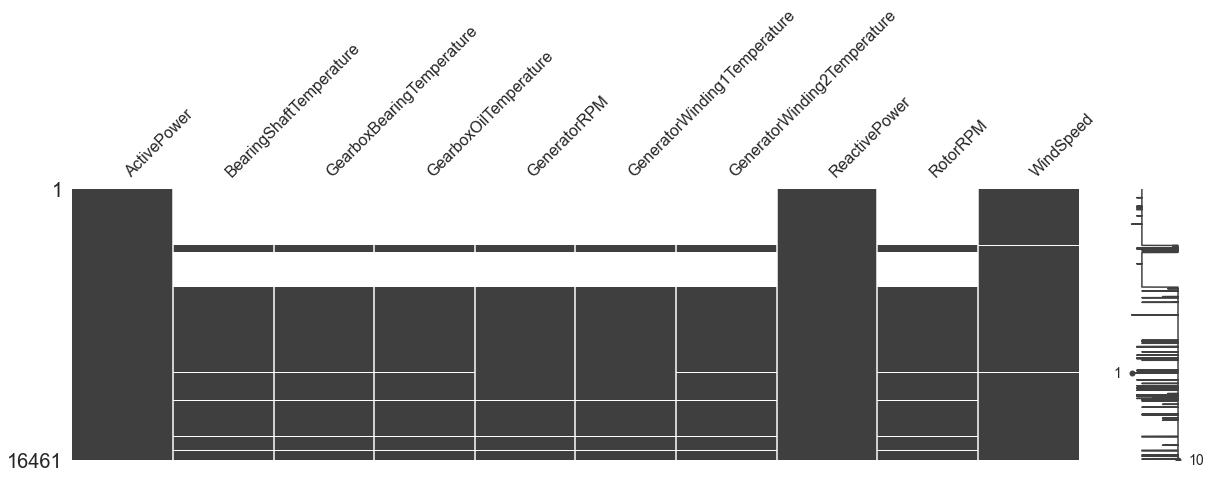

In [323]:
_ = msno.matrix(missing_turbine_data_v6, figsize=(20, 5))

In [334]:
missing_turbine_data_v7 = missing_turbine_data_v6.copy()
missing_turbine_data_v7['month'] = missing_turbine_data_v6.index.month
cols_to_fill = ['BearingShaftTemperature', 'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'RotorRPM']
missing_turbine_data_v7.loc['2018', cols_to_fill] = missing_turbine_data_v7.loc['2018', cols_to_fill].fillna(missing_turbine_data_v7.groupby(missing_turbine_data_v7.loc['2019'].month).transform('mean'))
missing_turbine_data_v7 = missing_turbine_data_v7.drop(['month'], axis=1)
get_info_pdf(missing_turbine_data_v7)

,feature,dtype,# values,# na,% missing
0,ActivePower,float64,16383,78,1.0
1,BearingShaftTemperature,float64,16254,207,2.0
2,GearboxBearingTemperature,float64,16256,205,2.0
3,GearboxOilTemperature,float64,16226,235,2.0
4,GeneratorRPM,float64,16228,233,2.0
5,GeneratorWinding1Temperature,float64,16226,235,2.0
6,GeneratorWinding2Temperature,float64,16233,228,2.0
7,ReactivePower,float64,16370,91,1.0
8,RotorRPM,float64,16228,233,2.0
9,WindSpeed,float64,16329,132,1.0


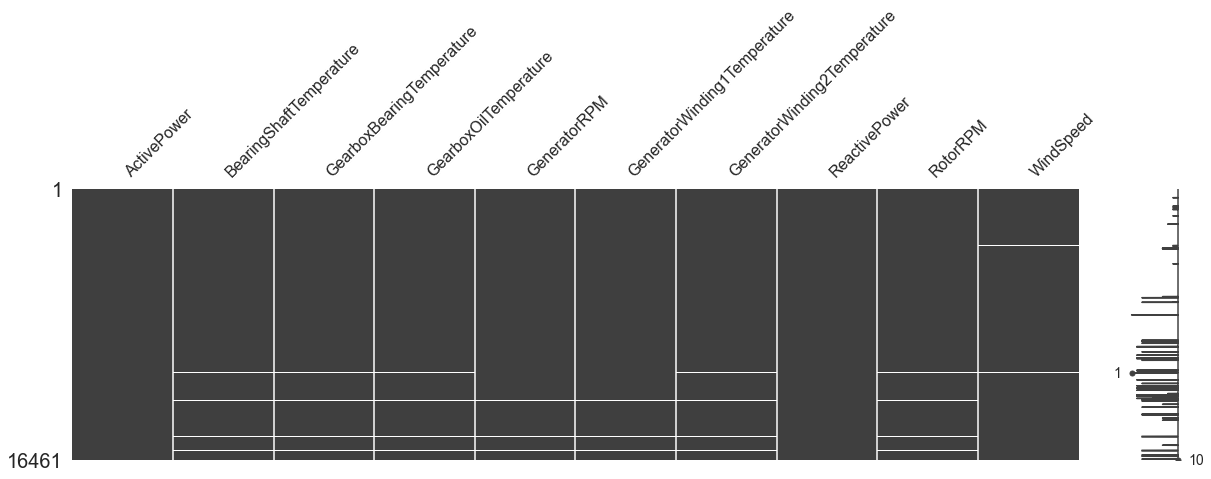

In [335]:
_ = msno.matrix(missing_turbine_data_v7, figsize=(20, 5))

we now interpolate the remaining values

In [336]:
missing_turbine_data_v8 = missing_turbine_data_v7.interpolate(method='linear')
get_info_pdf(missing_turbine_data_v8)

,feature,dtype,# values,# na,% missing
0,ActivePower,float64,16461,0,0.0
1,BearingShaftTemperature,float64,16461,0,0.0
2,GearboxBearingTemperature,float64,16461,0,0.0
3,GearboxOilTemperature,float64,16461,0,0.0
4,GeneratorRPM,float64,16461,0,0.0
5,GeneratorWinding1Temperature,float64,16461,0,0.0
6,GeneratorWinding2Temperature,float64,16461,0,0.0
7,ReactivePower,float64,16461,0,0.0
8,RotorRPM,float64,16461,0,0.0
9,WindSpeed,float64,16461,0,0.0


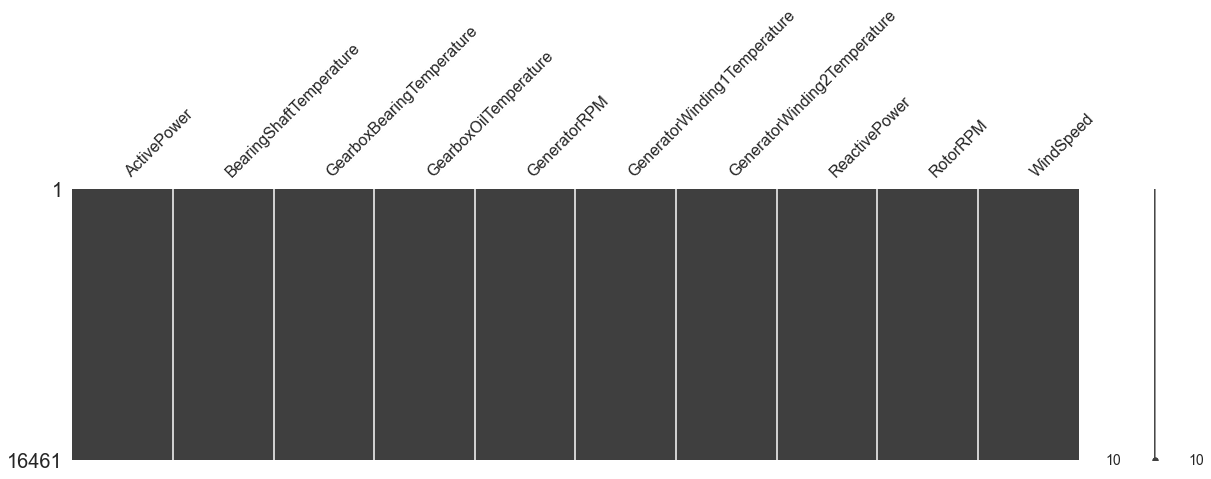

In [342]:
_ = msno.matrix(missing_turbine_data_v8, figsize=(20, 5))